<a href="https://colab.research.google.com/github/stemlock/facial_keypoint_detection/blob/master/Master_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/facial-keypoints-detection


In [6]:
import numpy as np
import pandas as pd
import keras 
import tensorflow as tf
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import zipfile


In [2]:
# Mount drive 
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
# cd into local repo
%cd gdrive/MyDrive/207_final_project/

/content/gdrive/MyDrive/207_final_project


In [ ]:
# Read in the data
train = pd.read_csv('data/training.zip', compression='zip')
test = pd.read_csv('data/test.zip', compression='zip')

In [9]:
# Head
train.head(3)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [11]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [26]:
# Test parsing the X (input) data
test = []
for i in train['Image'][0].split():
  test.append(int(i))


In [27]:
print(test)
print(len(test))

[238, 236, 237, 238, 240, 240, 239, 241, 241, 243, 240, 239, 231, 212, 190, 173, 148, 122, 104, 92, 79, 73, 74, 73, 73, 74, 81, 74, 60, 64, 75, 86, 93, 102, 100, 105, 109, 114, 121, 127, 132, 134, 137, 137, 140, 139, 138, 137, 137, 140, 141, 143, 144, 147, 148, 149, 147, 147, 148, 145, 147, 144, 146, 147, 147, 143, 134, 130, 130, 128, 116, 104, 98, 90, 82, 78, 85, 88, 86, 80, 77, 87, 108, 111, 115, 128, 133, 188, 242, 252, 250, 248, 251, 250, 250, 250, 235, 238, 236, 238, 238, 237, 238, 242, 241, 239, 237, 233, 215, 195, 187, 156, 119, 103, 93, 78, 68, 73, 75, 75, 72, 75, 70, 61, 66, 77, 91, 96, 106, 108, 113, 120, 125, 131, 134, 138, 135, 138, 139, 145, 144, 144, 142, 140, 141, 141, 148, 147, 150, 149, 152, 151, 149, 150, 147, 148, 144, 148, 144, 146, 146, 143, 139, 128, 132, 135, 128, 112, 104, 97, 87, 78, 79, 83, 85, 83, 75, 75, 89, 109, 111, 117, 117, 130, 194, 243, 251, 249, 250, 249, 250, 251, 237, 236, 237, 238, 237, 238, 241, 238, 238, 238, 241, 221, 195, 187, 163, 124, 106, 95

In [28]:
test_array = np.array(test).reshape((96,96))
test_array

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

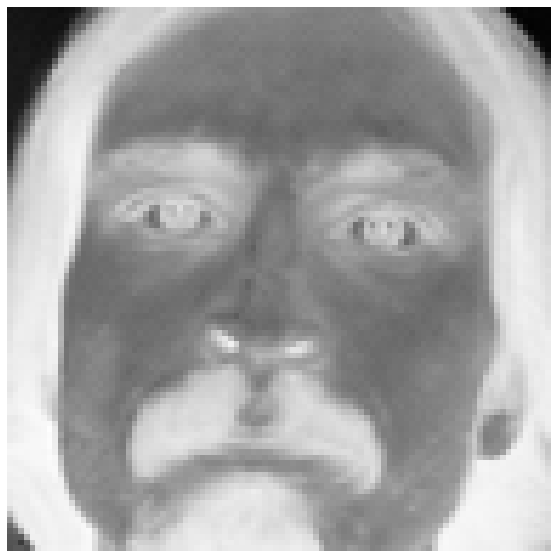

In [30]:
def plot_digit(digit, ax, axes):
    
    '''
    Renders/plots the digit matrix on top of a specified ax.
    '''
    
    # Plot the digit matrix and turn off the axis labels
    ax.imshow(digit, cmap ='Greys', vmin = 0, vmax = 255) 
    ax.axis(axes)

fig, ax = plt.subplots(1, figsize=(10,10))
plot_digit(test_array, ax, axes='off')

In [49]:
def image_parser(data):

  # Store the parse pixel values
  parsed = []

  # for every sample in data, parse the pixels and store to parsed
  for i, sample in enumerate(data):   
    parsed.append([]) 
    for pixel in sample.split():
      parsed[i].append(int(pixel))

  X = np.array(parsed).reshape((7049,96,96))
  
  return X

In [50]:
train_X = image_parser(train['Image'])

7049
9216


In [48]:
train_X.shape

(7049, 96, 96)

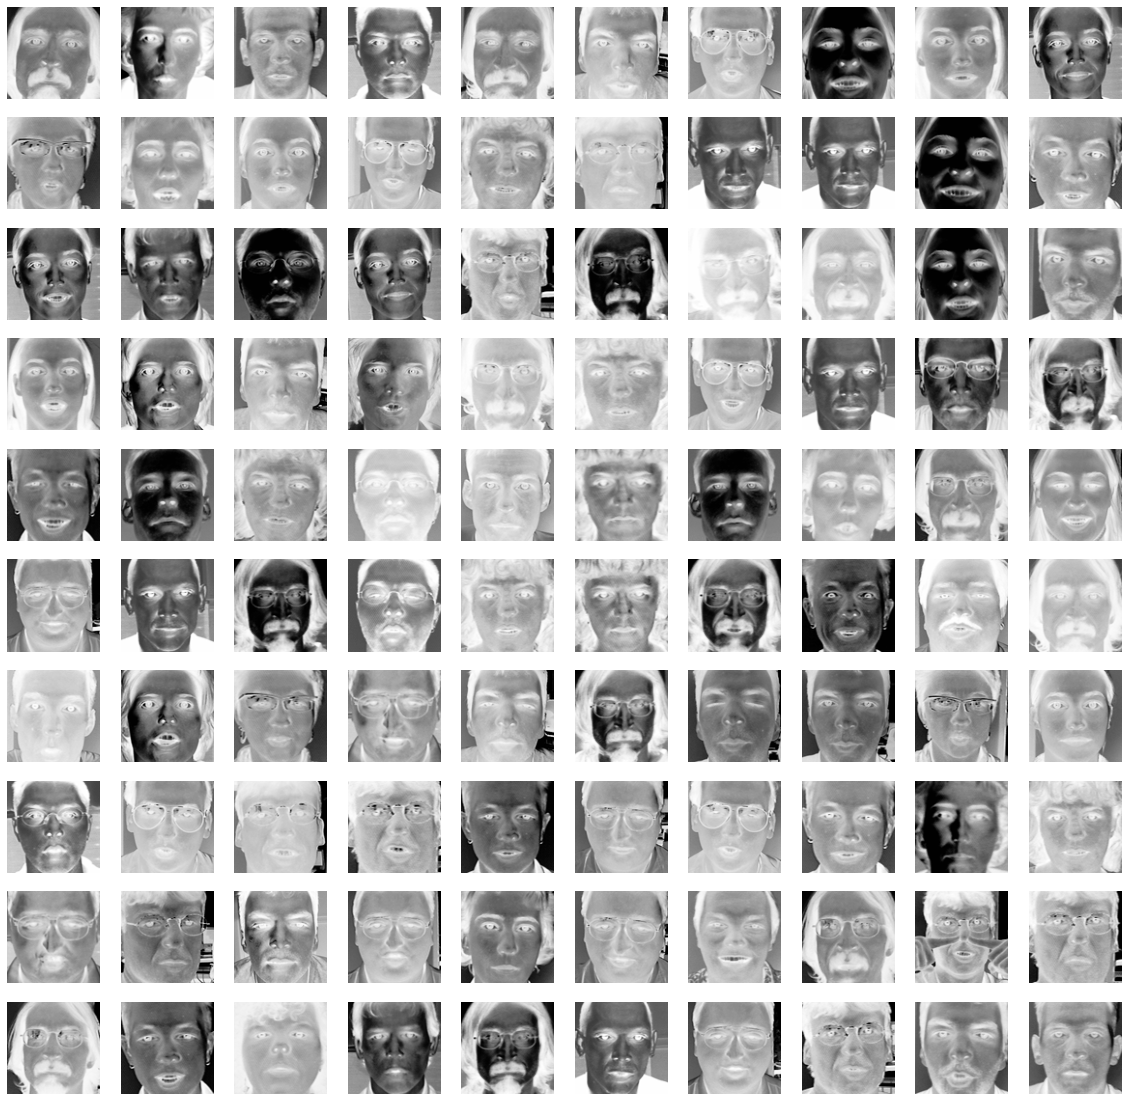

In [53]:
fig, ax = plt.subplots(10,10, figsize=(20,20))

num = 0

for i in range(len(ax)):
  for j in range(len(ax[i])):
    plot_digit(train_X[num], ax[i][j], axes='off')
    num+=1